#Instalando Librerias

In [ ]:
pip install pandas

In [ ]:
pip freeze

#Habilitar google drive

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Prestamos_records.csv

In [81]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/DataScience/DataSet's/prestamos_records.csv")

##Descubriendo los datos

In [29]:
#df.head(10) #Muestra las n primeras filas de los datos
#df.tail(10) #Muestra las n ultimas filas de los datos
#df.shape #Muestra la cantidad de filas y columnas
df.describe() #Muestra datos estadísticos descriptivos de los datos

,MONTO_DEL_PRESTAMO
count,8000.000000
mean,6502.262500
std,6471.159913
min,2500.000000
25%,2500.000000
50%,3800.000000
75%,7600.000000
max,35000.000000


##Limpieza de datos

In [43]:
#df_filtrado = df.dropna() #Filtra el df y elimina las filas con NaN
#df_filtrado.head() #Muestra los datos filtrados
#df_filtrado = df.fillna(0) #Llena los espacios NaN con un valor fijo
#df_filtrado.head() #Muestra los datos llenados
df_filtrado = df.fillna({"DEUDA_EXISTENTE": 0, "NOTAS_DEL_AGENTE": -1}) #Llenar datos dependiendo la columna
df_filtrado.head(20) #Muestra los datos llenados

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO
0,01May2014:09:24:27.000000,2500,760-779,"$10,001-$20,000",-1,NORTHERN CALIFORNIA,FALSO
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Ingreso anual neto: $25,400",SOUTHERN CALIFORNIA,FALSO
2,01May2014:10:10:36.000000,6300,740-759,"$100,000+",-1,ARIZONA,VERDADERO
3,01May2014:10:31:25.000000,4300,780-799,"$1-$10,000","Ingreso anual neto: $191,900",SOUTHERN CALIFORNIA,FALSO
4,01May2014:10:46:54.000000,20100,780-799,"$90,001-$100,000","Pagos mensuales de deuda verificados: $1,700",SOUTHERN CALIFORNIA,VERDADERO
5,01May2014:11:14:12.000000,6600,760-779,"$10,001-$20,000",-1,NORTHERN CALIFORNIA,FALSO
6,01May2014:11:23:11.000000,2500,700-719,"$100,000+","Ingreso anual neto: $63,100",ARIZONA,VERDADERO
7,01May2014:11:53:24.000000,10000,760-779,"$20,001-$30,000",-1,SOUTHERN CALIFORNIA,FALSO
8,01May2014:12:18:53.000000,8900,740-759,"$80,001-$90,000",-1,NORTHERN CALIFORNIA,FALSO
9,01May2014:12:32:41.000000,2500,760-779,"$30,001-$40,000",Pagos mensuales de deuda verificados: $590...I...,NORTHERN CALIFORNIA,FALSO


##Filtrado de Datos

###Filtrado por columnas

In [30]:
#df["UBICACION_DE_LA_OFICINA"] #trae una columna
df[["MONTO_DEL_PRESTAMO","PRESTAMO_INCUMPLIDO"]] #trae varias columnas

,MONTO_DEL_PRESTAMO,PRESTAMO_INCUMPLIDO
0,2500,FALSO
1,2500,FALSO
2,6300,VERDADERO
3,4300,FALSO
4,20100,VERDADERO
...,...,...
7995,3500,FALSO
7996,2500,VERDADERO
7997,2500,FALSO
7998,2500,VERDADERO


###Filtrado por filas

In [55]:
#df.iloc[0] #Trae el indice de la primera fila
#df.iloc[0:3] #Trae un rango de filas
df.iloc[[1,11,20]] #Trae filas especificas
#df.loc[[20,22]] #filtra por identificador}

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Ingreso anual neto: $25,400",SOUTHERN CALIFORNIA,FALSO
11,01May2014:12:59:04.000000,2500,780-799,"$10,001-$20,000","Ingreso mensual neto 16,670",NORTHERN CALIFORNIA,VERDADERO
20,01May2014:15:38:11.000000,5100,700-719,"$60,001-$70,000","Ingreso anual neto: $58,300",SOUTHERN CALIFORNIA,FALSO


###Filtrado de filas y columnas

In [58]:
df.loc[[40,50],["RECORD_CREATION_DATE","MONTO_DEL_PRESTAMO"]] #filtra por identificador y trae las columnas indicadas

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO
40,02May2014:12:42:57.000000,2500
50,02May2014:15:50:53.000000,6900


###Filtrado por condiciones

In [68]:
#df[df["MONTO_DEL_PRESTAMO"]>10000] #Trae la columna cuyo valor es mayor a 10000
df[(df["MONTO_DEL_PRESTAMO"]>20000) & (df["PRESTAMO_INCUMPLIDO"]=="VERDADERO")] #Trae dos columnas por condiciones

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO
4,01May2014:10:46:54.000000,20100,780-799,"$90,001-$100,000","Pagos mensuales de deuda verificados: $1,700",SOUTHERN CALIFORNIA,VERDADERO
202,09May2014:17:25:39.000000,23100,780-799,"$50,001-$60,000",NaN,ARIZONA,VERDADERO
223,12May2014:14:22:04.000000,31500,740-759,"$100,000+","Ingreso anual neto: $200,000",SOUTHERN CALIFORNIA,VERDADERO
237,13May2014:09:04:42.000000,35000,760-779,NaN,NaN,ARIZONA,VERDADERO
261,13May2014:17:38:45.000000,35000,720-739,NaN,El cliente no tiene deuda,WASHINGTON STATE,VERDADERO
...,...,...,...,...,...,...,...
7537,16Apr2015:15:43:02.000000,23100,780-799,NaN,"Ingreso anual neto: $54,300",SOUTHERN CALIFORNIA,VERDADERO
7738,27Apr2015:12:38:53.000000,22000,800+,"$100,000+","Ingreso mensual neto 13,030",SOUTHERN CALIFORNIA,VERDADERO
7772,28Apr2015:14:59:04.000000,29900,700-719,"$100,000+","Ingreso mensual neto 12,480",NORTHERN CALIFORNIA,VERDADERO
7918,05May2015:12:13:29.000000,35000,780-799,NaN,El cliente no tiene deuda,ARIZONA,VERDADERO


####Filtrado por condiciones de texto

In [70]:
df[df["UBICACION_DE_LA_OFICINA"].str.contains("ARIZONA")] #trae todas las filas del df donde la columna contenga lo que se requiera

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO
2,01May2014:10:10:36.000000,6300,740-759,"$100,000+",NaN,ARIZONA,VERDADERO
6,01May2014:11:23:11.000000,2500,700-719,"$100,000+","Ingreso anual neto: $63,100",ARIZONA,VERDADERO
16,01May2014:14:53:53.000000,2500,780-799,"$1-$10,000","Ingreso anual neto: $17,300",ARIZONA,FALSO
21,01May2014:15:58:39.000000,2500,780-799,NaN,El cliente no tiene deuda...Ingreso anual neto...,ARIZONA,VERDADERO
22,01May2014:16:26:10.000000,2500,740-759,"$20,001-$30,000","Ingreso mensual neto 4,150",ARIZONA,FALSO
...,...,...,...,...,...,...,...
7980,07May2015:11:33:06.000000,3300,780-799,"$20,001-$30,000",NaN,ARIZONA,FALSO
7983,07May2015:12:01:37.000000,4100,800+,NaN,El cliente no tiene deuda,ARIZONA,FALSO
7988,07May2015:13:37:23.000000,4300,740-759,"$1-$10,000",NaN,ARIZONA,VERDADERO
7989,07May2015:13:58:59.000000,3400,700-719,"$20,001-$30,000",NaN,ARIZONA,FALSO


##Transformacion de datos

In [100]:
import random
group = def interes(MONTO_DEL_PRESTAMO):
  interes = MONTO_DEL_PRESTAMO * random.randint(1,4)
  return interes
df_filtrado["INTERES_DEL_PRESTAMO"] = df_filtrado["MONTO_DEL_PRESTAMO"].apply(interes)
df_filtrado.head(10)

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO,INTERES_DEL_PRESTAMO
0,01May2014:09:24:27.000000,2500,760-779,"$10,001-$20,000",-1,NORTHERN CALIFORNIA,FALSO,7500
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Ingreso anual neto: $25,400",SOUTHERN CALIFORNIA,FALSO,7500
2,01May2014:10:10:36.000000,6300,740-759,"$100,000+",-1,ARIZONA,VERDADERO,12600
3,01May2014:10:31:25.000000,4300,780-799,"$1-$10,000","Ingreso anual neto: $191,900",SOUTHERN CALIFORNIA,FALSO,8600
4,01May2014:10:46:54.000000,20100,780-799,"$90,001-$100,000","Pagos mensuales de deuda verificados: $1,700",SOUTHERN CALIFORNIA,VERDADERO,80400
5,01May2014:11:14:12.000000,6600,760-779,"$10,001-$20,000",-1,NORTHERN CALIFORNIA,FALSO,13200
6,01May2014:11:23:11.000000,2500,700-719,"$100,000+","Ingreso anual neto: $63,100",ARIZONA,VERDADERO,5000
7,01May2014:11:53:24.000000,10000,760-779,"$20,001-$30,000",-1,SOUTHERN CALIFORNIA,FALSO,20000
8,01May2014:12:18:53.000000,8900,740-759,"$80,001-$90,000",-1,NORTHERN CALIFORNIA,FALSO,8900
9,01May2014:12:32:41.000000,2500,760-779,"$30,001-$40,000",Pagos mensuales de deuda verificados: $590...I...,NORTHERN CALIFORNIA,FALSO,10000


##Agrupación de datos

In [93]:
#df.groupby("UBICACION_DE_LA_OFICINA").mean() #Agrupa la columna especificada por el promedio
df.groupby("UBICACION_DE_LA_OFICINA").agg({
    "MONTO_DEL_PRESTAMO": 'sum'
})

,MONTO_DEL_PRESTAMO
UBICACION_DE_LA_OFICINA,
ARIZONA,10612900
NEVADA,6758500
NORTHERN CALIFORNIA,11324600
OREGON,4713900
SOUTHERN CALIFORNIA,13573600
WASHINGTON STATE,5034600


###Filtrado de agrupación de datos

In [94]:
grouped = df.groupby("UBICACION_DE_LA_OFICINA").agg({
    "MONTO_DEL_PRESTAMO": 'sum'
})
grouped[grouped["MONTO_DEL_PRESTAMO"]>4713900]

,MONTO_DEL_PRESTAMO
UBICACION_DE_LA_OFICINA,
ARIZONA,10612900
NEVADA,6758500
NORTHERN CALIFORNIA,11324600
SOUTHERN CALIFORNIA,13573600
WASHINGTON STATE,5034600


##Graficación de datos

###Gráfico de Lineas

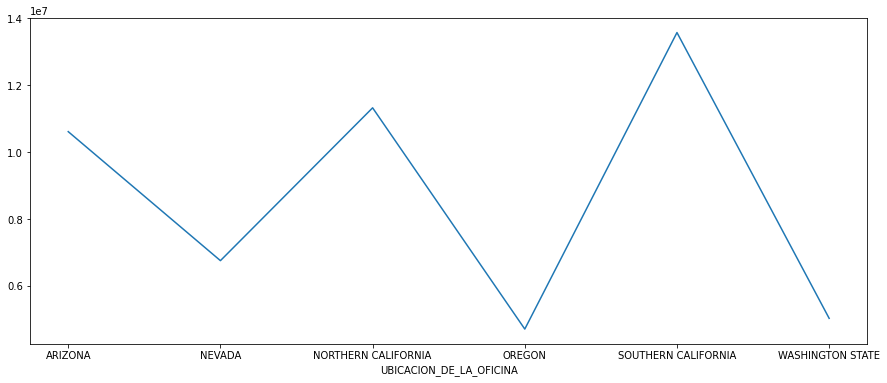

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
grouped["MONTO_DEL_PRESTAMO"].plot()
plt.show()

Gráfico de Barras

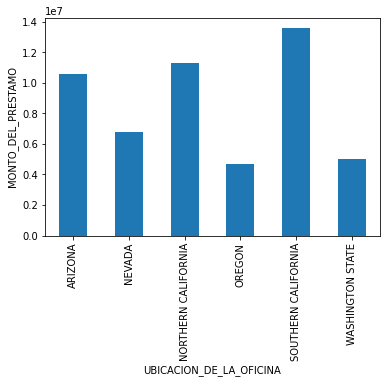

In [103]:
grouped["MONTO_DEL_PRESTAMO"].plot(kind='bar')
plt.ylabel('MONTO_DEL_PRESTAMO')
plt.show()

#User_timestamp.csv

In [104]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/DataScience/DataSet's/user_timestamp.csv")
#index_col="user_id"

##Limpieza de datos

In [105]:
#df.head() #trae los primeros datos
#df.tail()
df.describe()
#df.dropna()
#df_filtrado = df.dropna() #Eliminar datos que son nulos
#df_filtrado.head() #Muestra los datos eliminados que son nulos
#df.fillna(0) #Agrega un 0 en las casillas que tengan datos nulos 
#df_filtrado = df.fillna({"col1":0,"col2":-1})

,user_id
count,61582.000000
mean,473.695025
std,298.947097
min,0.000000
25%,205.000000
50%,456.000000
75%,728.000000
max,1014.000000


##Filtrado de datos

In [106]:
#df["timestamp"] #trae una columna
df[["user_id","timestamp"]] #trae varias columnas

,user_id,timestamp
0,621.0,0:00:02
1,818.0,0:00:10
2,4.0,0:00:21
3,563.0,0:00:21
4,671.0,0:00:26
...,...,...
71991,NaN,NaN
71992,NaN,NaN
71993,NaN,NaN
71994,NaN,NaN


##Filtrado de Filas

In [107]:
#df.iloc[0] #trae los datos de la fila 0
#df.iloc[0:3] #trae los datos de la fila 0 hasta la 3
#df.iloc[[0,1,2]] #trae filas especificas
df.loc[[20,22]] #filtra por identificador}

,user_id,timestamp
20,531.0,0:01:53
22,612.0,0:02:47


##Filtrado de filas y columnas

In [108]:
df.loc[[40,50],["user_id","timestamp"]] #filtra por identificador y trae las columnas indicadas

,user_id,timestamp
40,341.0,0:05:54
50,218.0,0:07:36


##Filtrado por condiciones

In [109]:
#df[df["user_id"]>800] #trae la columna cuyo valor es mayor a 800
df[(df["user_id"]>800) & (df["timestamp"])] #Trae dos columnas por condiciones
#df[df["timestamp"].str.contains("programa")] #trae todas las filas del df donde la columna contenga lo que se requiera

,user_id,timestamp
1,818.0,0:00:10
9,831.0,0:01:04
12,818.0,0:01:32
15,971.0,0:01:43
19,941.0,0:01:50
...,...,...
61567,948.0,23:58:15
61568,995.0,23:58:23
61575,873.0,23:59:08
61576,808.0,23:59:13


#LIBRERIA MATPLOTLIB

##Line Plots

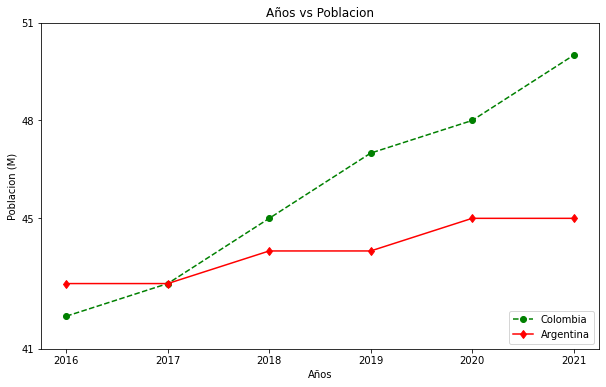

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Pais 1
x = [2016,2017,2018,2019,2020,2021]
y = [42,43,45,47,48,50]

# Pais 2
x2 = [2016,2017,2018,2019,2020,2021]
y2 = [43,43,44,44,45,45]

plt.plot(x,y, marker='o', linestyle='--',color='g',label='Colombia')
plt.plot(x2,y2,marker='d', linestyle='-',color='r',label='Argentina')

plt.xlabel('Años')
plt.ylabel('Poblacion (M)')
plt.title('Años vs Poblacion')
plt.legend(loc='lower right')

plt.yticks([41,45,48,51])

#plt.savefig('matlib.png')

plt.show()

##Bar Plots

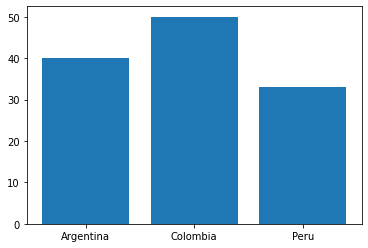

In [ ]:
x = ['Argentina','Colombia','Peru']
y = [40,50,33]

plt.bar(x,y)
plt.show()

##Piecharts

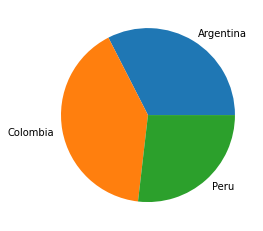

In [ ]:
plt.pie(y,labels=x)
plt.show()

##Histograms

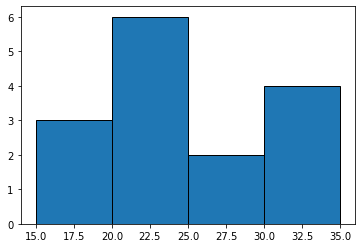

In [ ]:
edades = [15,16,17,20,21,21,22,23,24,25,26,30,31,32,35]
bins = [15,20,25,30,35]

plt.hist(edades,bins,edgecolor='black')
plt.show()

##Boxplots

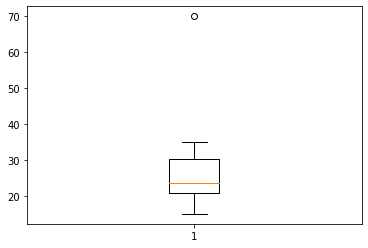

In [ ]:
edades = [15,16,17,20,21,21,22,23,24,25,26,30,31,32,35,70]
plt.boxplot(edades)
plt.show()

##Scatterplot

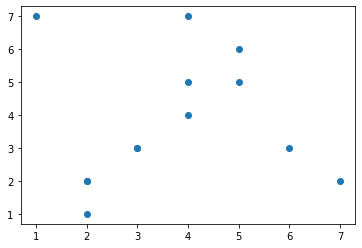

In [ ]:
a = [1,2,3,4,5,4,3,2,2,4,5,6,7]
b = [7,2,3,5,5,7,3,2,1,4,6,3,2]

plt.scatter(a,b)
plt.show()

##Subplots

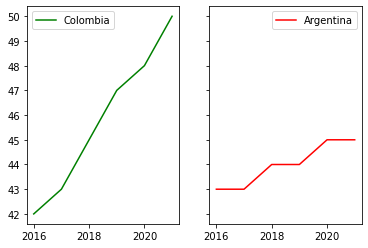

In [ ]:
fig,ax = plt.subplots(1,2,sharey=True)

ax[0].plot(x,y,color='g',label='Colombia')
ax[0].legend()
ax[1].plot(x2,y2,color='r',label='Argentina')
ax[1].legend()

plt.show()